In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [22]:
def th_mean(t, x0=0, D=1, k=1, beta=1):
    return x0 * np.exp(-D*k*beta*t)

def th_var(t, D=1, k=1, beta=1):
    return 1/np.sqrt(k*beta) * (1-np.exp(-2*D*k*beta*t))

In [5]:
method = 'lang'
num_particles = 1000
max_t = 10
dt = 0.01
x0 = 2
D = 1
beta = 1
k = 1
num_steps = int(max_t/dt)

In [44]:
Ns = [100, 300, 500, 700, 1000, 5000, 10000, 50000]

In [45]:
RMSD_mean = []
RMSD_var = []

for i, N in enumerate(Ns):
    ts, xs = simulate(harmonic_potential(k=k), method=method,
                      num_particles=N, dt=dt, max_t=max_t,
                      x0=x0, D=D, beta=beta)
    
    mean_predict = th_mean(ts, x0)
    mean_sim = np.mean(xs, axis=1)
    RMSD_mean.append(np.sqrt(np.mean((mean_sim-mean_predict)**2)))
    
    var_predict = th_var(ts)
    var_sim = np.var(xs, axis=1)
    RMSD_var.append(np.sqrt(np.mean((var_sim-var_predict)**2)))

100%|██████████| 999/999 [00:18<00:00, 55.21it/s]


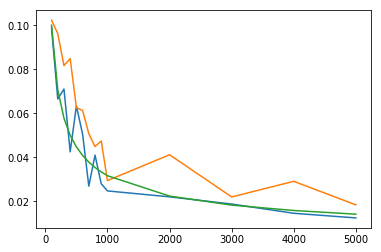

In [46]:
plt.plot(Ns, RMSD_mean)
plt.plot(Ns, RMSD_var)
plt.plot(Ns, 1/np.sqrt(Ns))